In [1]:
#Вспомогательная функция для раскраски вершин графа в соответствии с переданной маской:

import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

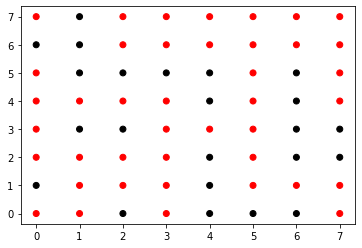

In [2]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')

plot_grid(narr)

In [27]:
#Берём марковскую цепь, состояния которой - допустимые графы.
#Новое состояние: берём вершины графа такие, что изменяя значение в них получится граф без пар смежных верших с 1. 
#Меняем значение у 1 такой вершины. Переходим к следущему состоянию.

from scipy import stats

def g_test(x, start=0.5, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def fun1(S, i, j):
    return (i == 0 or not S[i - 1, j]) and (j == 0 or not S[i, j - 1]) and \
           (i == S.shape[0] - 1 or not S[i + 1, j]) and \
           (j == S.shape[1] - 1 or not S[i, j + 1])

def funct(S):
    A = []
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            if S[i, j] or fun1(S, i, j):     
                A.append((i, j))
    return A

def new_S(S):
    A = funct(S)     
    B = A[np.random.randint(0, len(A))] 
    new_s = np.array(S)
    new_s[B[0],B[1]] = not S[B[0],B[1]]
    new_a = funct(new_s)
    if np.random.uniform() < len(A)/len(new_a):
        return new_s
    return S

#Оцениваем E𝑛(𝜉) для графа 8х8:
n = 8
S = np.array([[False] * n] * n)  #состояния
A = []
for i in range(50000):
    A.append(S.sum())
    S = new_S(S)   #новое состояние 
np.array(A).mean()

15.40076

Ttest_indResult(statistic=0.9717786525564447, pvalue=0.33116655929194294)

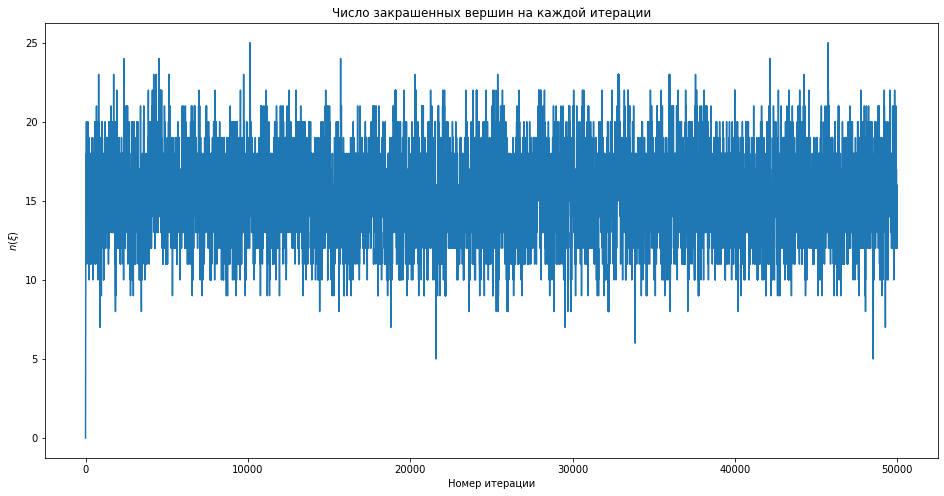

In [42]:
#Обосновать численно и графически стационарность

plt.figure(figsize=(16,8))
plt.plot(A)
plt.title("Число закрашенных вершин на каждой итерации")
plt.ylabel("$ n(\\xi) $")
plt.xlabel("Номер итерации")

g_test(samples[10000:]) #из значений делаем вывод, что гипотеза о стационарности не отклоняется.

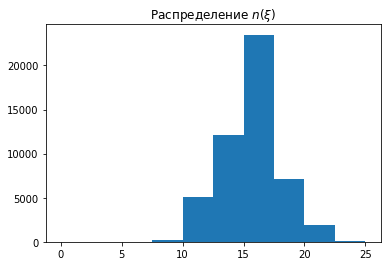

In [40]:
#Построить график распределеиня  𝑛(𝜉) 

plt.hist(A)
plt.title("Распределение $ n(\\xi) $")
plt.show()